# Zeropoint test


* Discussed ZP calibration with Matteo Fossati in Trieste
* Looking at color terms in ZP fitting



In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
os.chdir('/home/rfinn/research/Virgo/zp-color-test')

In [3]:
sys.path.append('/home/rfinn/github/HalphaImaging/python3/')

In [4]:
import getzp

In [5]:
myargs = getzp.args('VF-215.0379+3.9552-INT-20190208-p131-r-shifted.fits','i','r')

In [6]:
zp = getzp.getzp(myargs)

found SE cat!!!
panstarrs table already downloaded


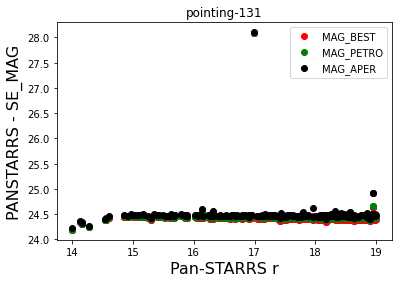

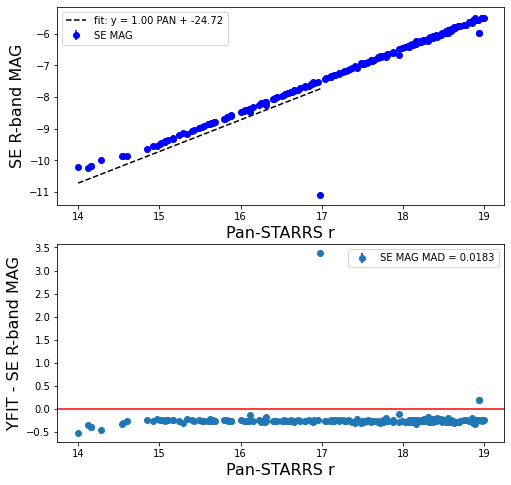

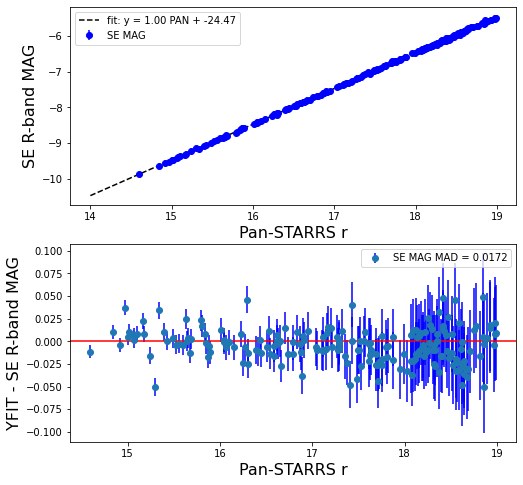

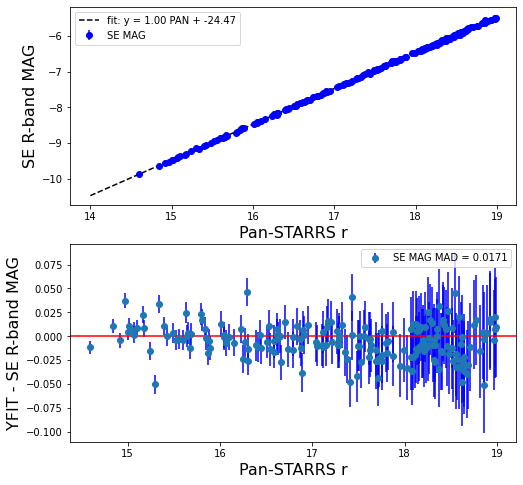

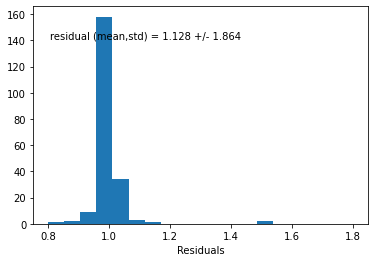

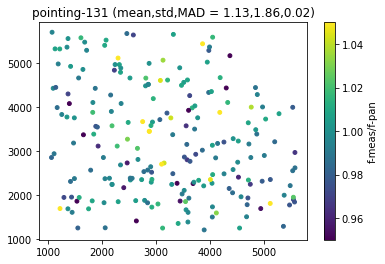

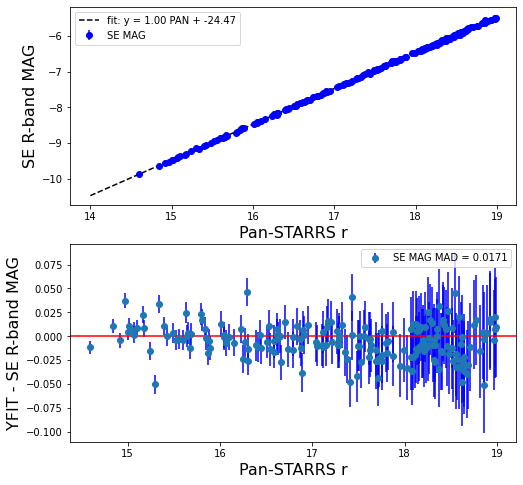

In [7]:
zp.getzp()

Text(0.5, 0, 'PANSTARRS r')

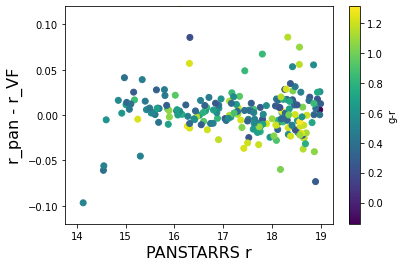

In [8]:
# plot SE mag - panstarrs r vs g-i color

y = zp.pan['rmag'] - zp.matchedarray1['MAG_APER'][:,5] + zp.zp
x = zp.pan['rmag']
c = zp.pan['gmag'] - zp.pan['rmag']
flag = zp.fitflag & zp.matchflag
x = x[flag]
y = y[flag]
c = c[flag]
plt.scatter(x,y,c=c)
plt.colorbar(label='g-r')
plt.ylim(-.12,.12)
plt.ylabel("r_pan - r_VF",fontsize=16)
plt.xlabel("PANSTARRS r",fontsize=16)
# fit a line


In [ ]:
zp.zp

# Repeat for Halpha Image



In [9]:
myargs2 = getzp.args('VF-215.0379+3.9552-INT-20190208-p131-Halpha.fits','i','ha')

In [10]:
hzp = getzp.getzp(myargs2)

found SE cat!!!
panstarrs table already downloaded


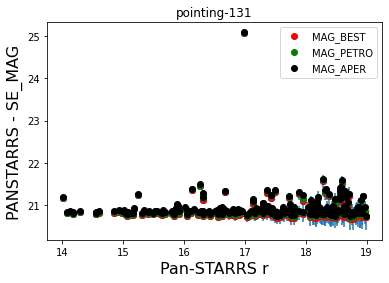

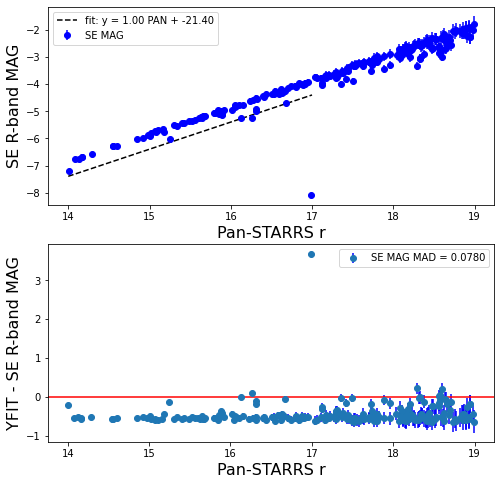

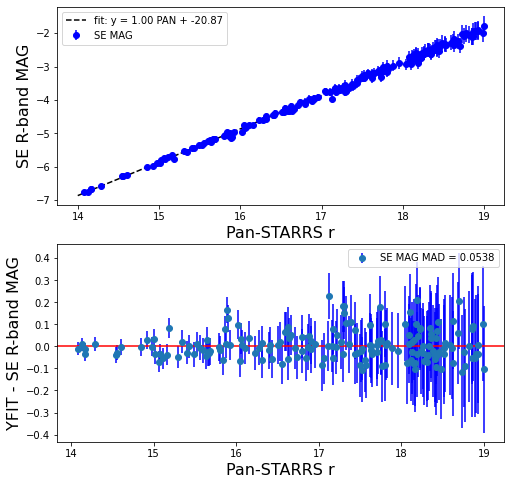

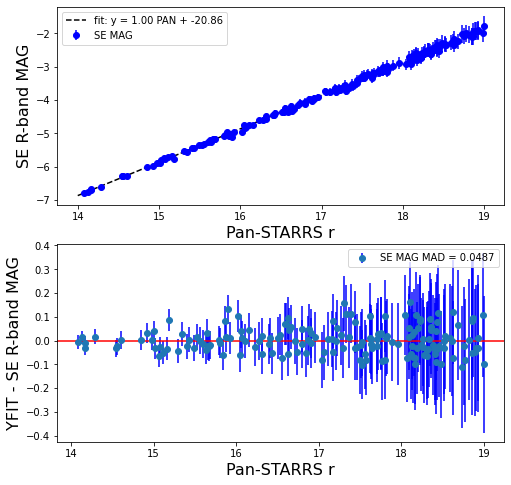

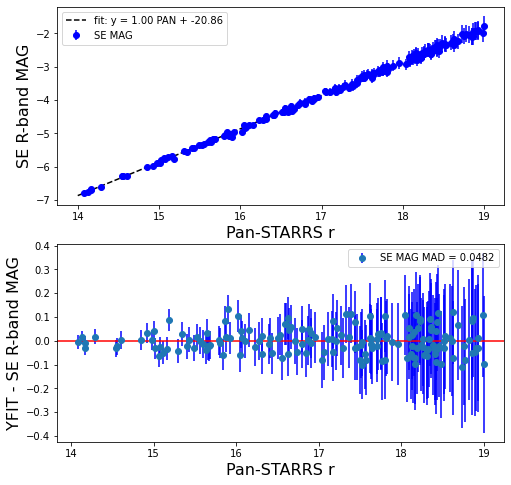

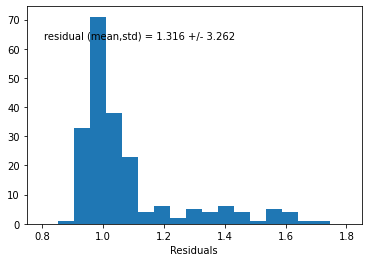

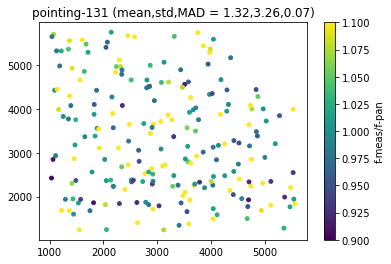

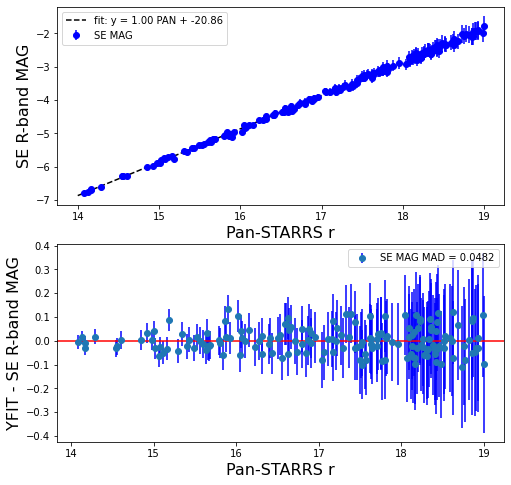

In [11]:
hzp.getzp()

Text(0.5, 0, 'PANSTARRS r')

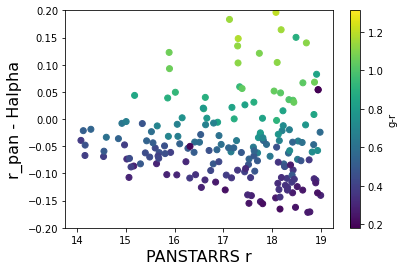

In [12]:
# plot SE mag - panstarrs r vs g-i color
# this shows residuals with Halpha ZP as a function of star color

y = hzp.pan['rmag'] - hzp.matchedarray1['MAG_AUTO']+hzp.zp
x = hzp.pan['rmag']
c = hzp.pan['gmag'] - hzp.pan['rmag']
flag = hzp.fitflag & hzp.matchflag
x = x[flag]
y = y[flag]
c = c[flag]
plt.scatter(x,y,c=c)
plt.ylim(-.2,.2)
plt.colorbar(label='g-r')
plt.ylabel("r_pan - Halpha",fontsize=16)
plt.xlabel("PANSTARRS r",fontsize=16)

Text(0.5, 0, 'PANSTARRS r')

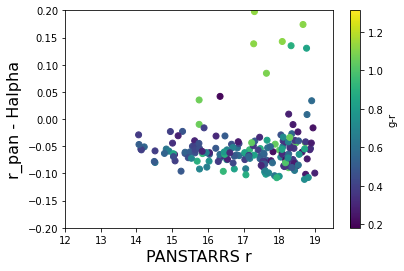

In [13]:
PS1_r = hzp.pan['rmag']
PS1_g = hzp.pan['gmag']

PS1_r = PS1_r + 0.0182*(PS1_g-PS1_r)**22 + -0.2662*(PS1_g-PS1_r) + 0.0774


# plot SE mag - panstarrs r vs g-i color

y = PS1_r - hzp.matchedarray1['MAG_APER'][:,5]+hzp.zp
x = PS1_r
c = hzp.pan['gmag'] - hzp.pan['rmag']
flag = hzp.fitflag & hzp.matchflag
x = x[flag]
y = y[flag]
c = c[flag]
plt.scatter(x,y,c=c)
plt.xlim(12,19.5)
plt.ylim(-.2,.2)
plt.colorbar(label='g-r')
plt.ylabel("r_pan - Halpha",fontsize=16)
plt.xlabel("PANSTARRS r",fontsize=16)

# Need to try with an HDI image and a BOK image

* I don't understand why some points that are large outliers are not getting rejected

* I also don't understand why there is a slope in the residuals wrt the r-band magnitude - maybe this is a problem with the aperture magnitudes?

In [14]:
myargs = getzp.args('VF-20210414-BOK-VFID0638-r.fits','i','r')

In [15]:
zpr2 = getzp.getzp(myargs)

found SE cat!!!
panstarrs table already downloaded


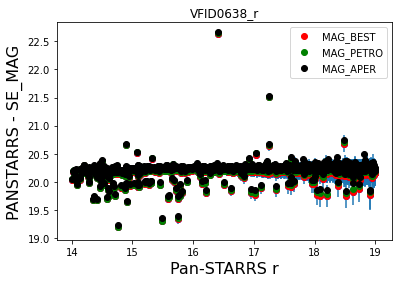

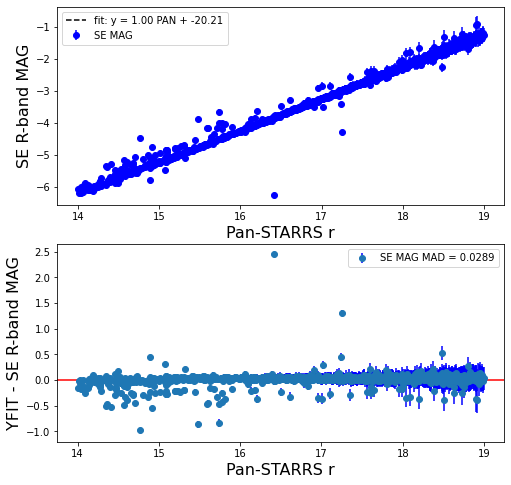

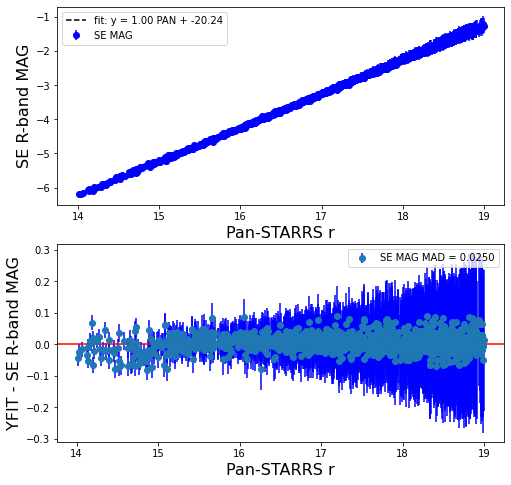

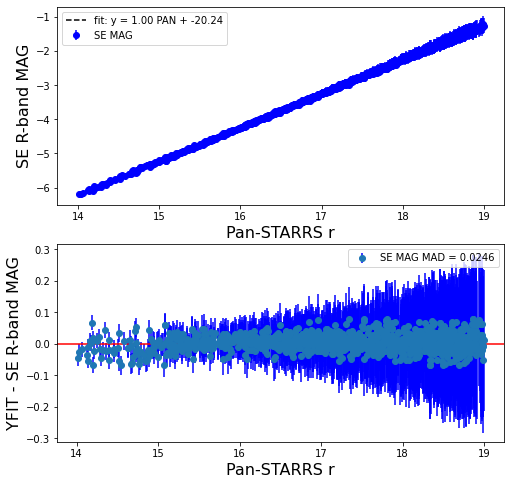

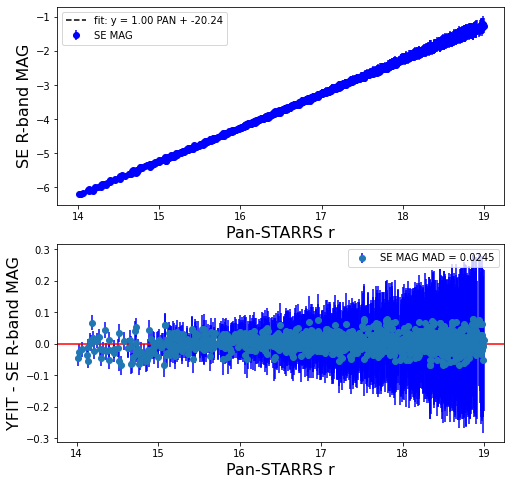

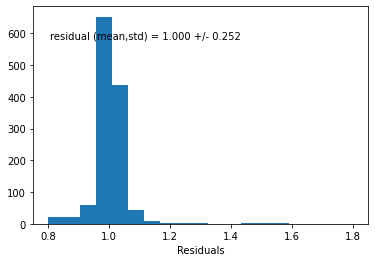

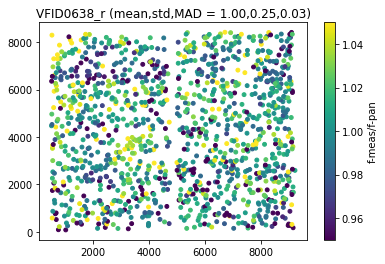

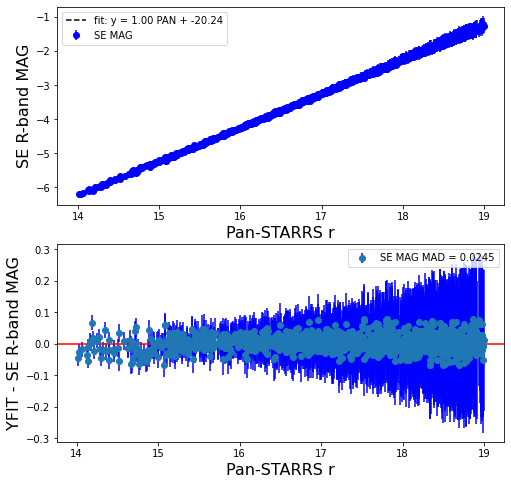

In [16]:
zpr2.getzp()